In [155]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shelve
import os
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (20, 12)

In [137]:
clean_adult = pd.read_hdf('results/df1.h5', 'clean_adult/')
clean_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


# Sex, Race, and Occupation

In [138]:
female = clean_adult[clean_adult["sex"] == "Female"]
male = clean_adult[clean_adult["sex"] == "Male"]


In [139]:
test = []
for name, group in clean_adult.groupby("sex"):
    if name == "Female":
        test = group
test
len(clean_adult.groupby("sex"))

2

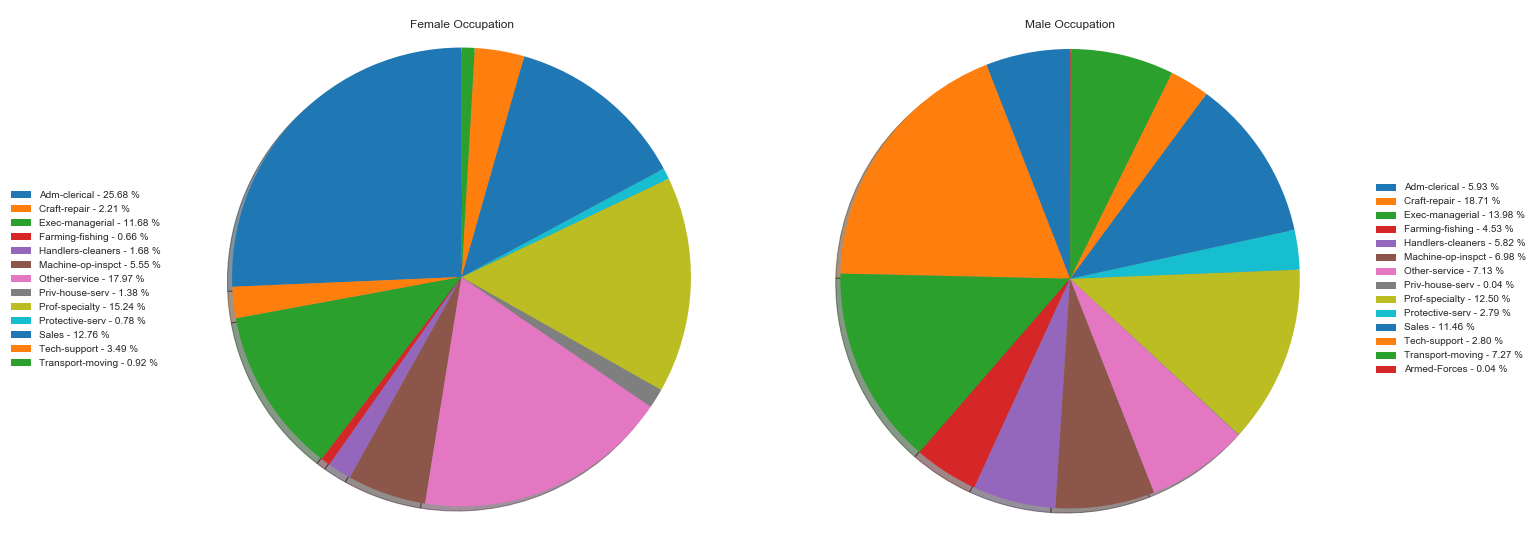

In [142]:
fig, axes = plt.subplots(nrows=1, ncols=2)
ax1 = axes[0]
counts = female["occupation"].value_counts().sort_index()
percents = 100 * counts.values/counts.values.sum()
patches, texts = ax1.pie(percents, shadow=True, startangle=90)
ax1.axis("equal")
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(counts.index, percents)]
ax1.legend(patches, labels, loc="center", bbox_to_anchor=(-0.24, 0.5),
           fontsize=10)
ax1.set_title("Female Occupation", y = 0.95)

ax2 = axes[1]
counts = male["occupation"].value_counts().sort_index()
#Drop Armed Forces and append to end so that occupations match
armed_forces = counts["Armed-Forces"]
counts = counts.drop("Armed-Forces")
counts["Armed-Forces"] = armed_forces
percents = 100 * counts.values/counts.values.sum()
patches, texts = ax2.pie(percents, shadow=True, startangle=90)
ax2.axis("equal")
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(counts.index, percents)]
ax2.legend(patches, labels, loc="center", bbox_to_anchor=(1.25, 0.5),
           fontsize=10)
ax2.set_title("Male Occupation", y = 0.95)
fig.savefig("fig/occupation_by_sex.png")


In [143]:
races_groups = clean_adult.groupby("race")


In [171]:
s = set()
s.add(1)
s2 = set()
s2.add(1)
s2.add(2)
s.union(s2)
s

{1}

In [191]:
def plot_pie(data, groupby_columns, plot_column):
    groups = data.groupby(groupby_columns)
    nrows = round((len(groups) + 0.0001)/2)
    fig, axes = plt.subplots(nrows=nrows, ncols=2)
    row = 0
    column = 0
    unique_values = data[plot_column].unique()
    #Get all values which not all groups contain
    s = set()
    for name, group in groups:
        for value in unique_values:        
            if value not in group[plot_column].unique():
                s.add(value)
    for name, group in groups:
        if nrows > 1:
            ax = axes[row, column]
        else:
            ax = axes[column]
        counts = group[plot_column].value_counts().sort_index()
        for value in s:
        #Drop values which not all groups contain and append to end so that occupations match
            if value in counts.index:
                dropped_value = counts[value]
                counts = counts.drop(value)
                counts[value] = dropped_value
        percents = 100 * counts.values/counts.values.sum()
        patches, texts = ax.pie(percents, shadow=True, startangle=90)
        ax.axis("equal")
        labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(counts.index, percents)]
        if column == 0:
            ax.legend(patches, labels, loc="center", bbox_to_anchor=(-0.4, 0.5), ncol = 2,
                       fontsize=12)
        else:
            ax.legend(patches, labels, loc="center", bbox_to_anchor=(1.4, 0.5), ncol = 2,
                       fontsize=12)        
        ax.set_title("".join(name) + " " + plot_column, y = 0.95, fontsize=15)

        #if column = 0, then it is next 1. If column = 1, then it is next 0
        column = 1 - column
        #move on to next row
        if column == 0:
            row += 1
    #if odd number of plots, hide last axis
    if column == 1:
        axes[-1, -1].axis("off")
    fig.savefig("fig/" + plot_column + "_by_" + "".join(groupby_columns) + ".png")


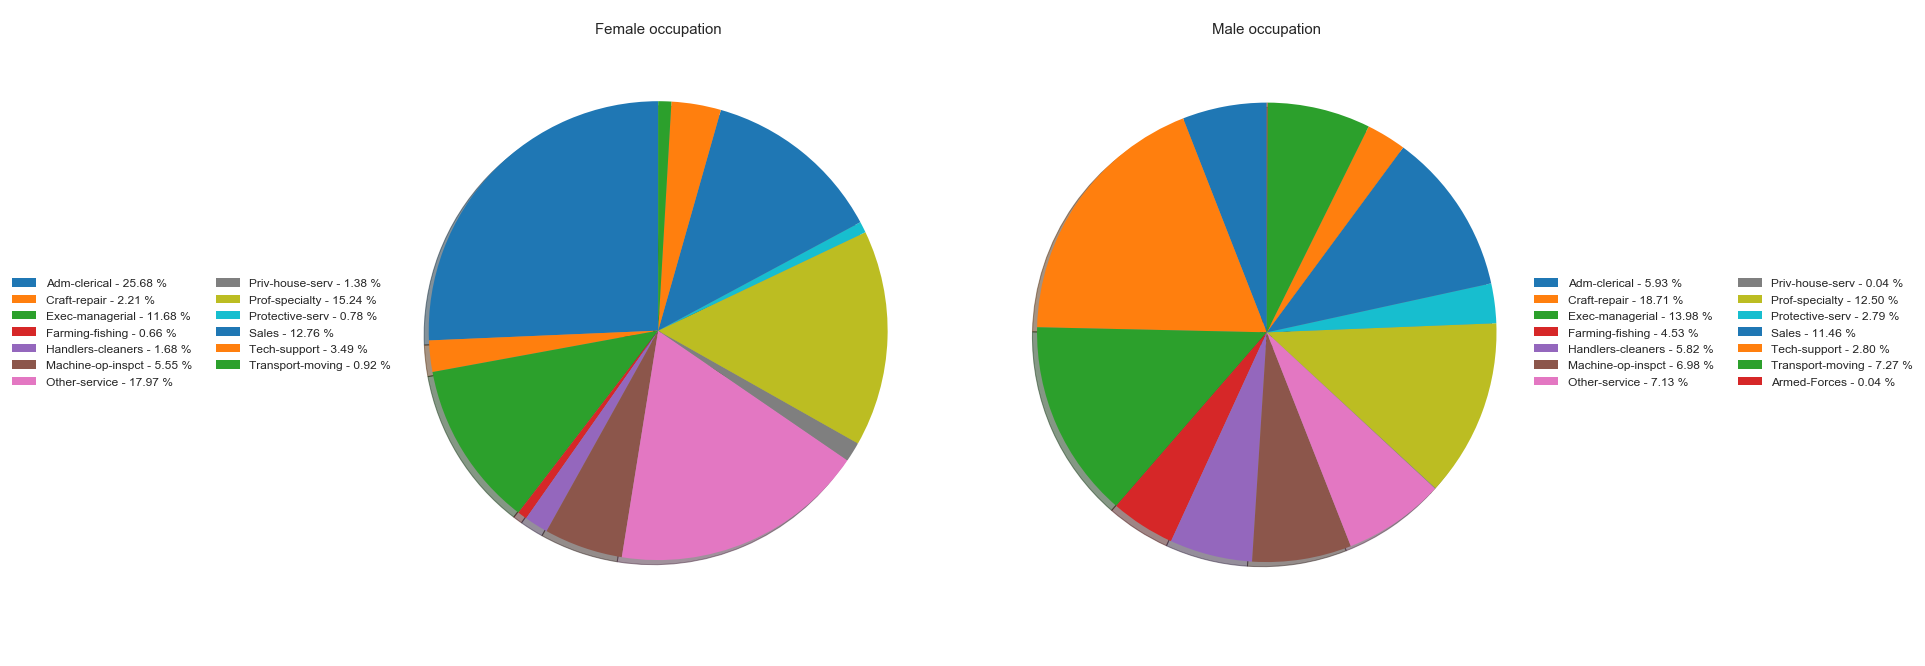

In [192]:
plot_pie(clean_adult, "sex", "occupation")

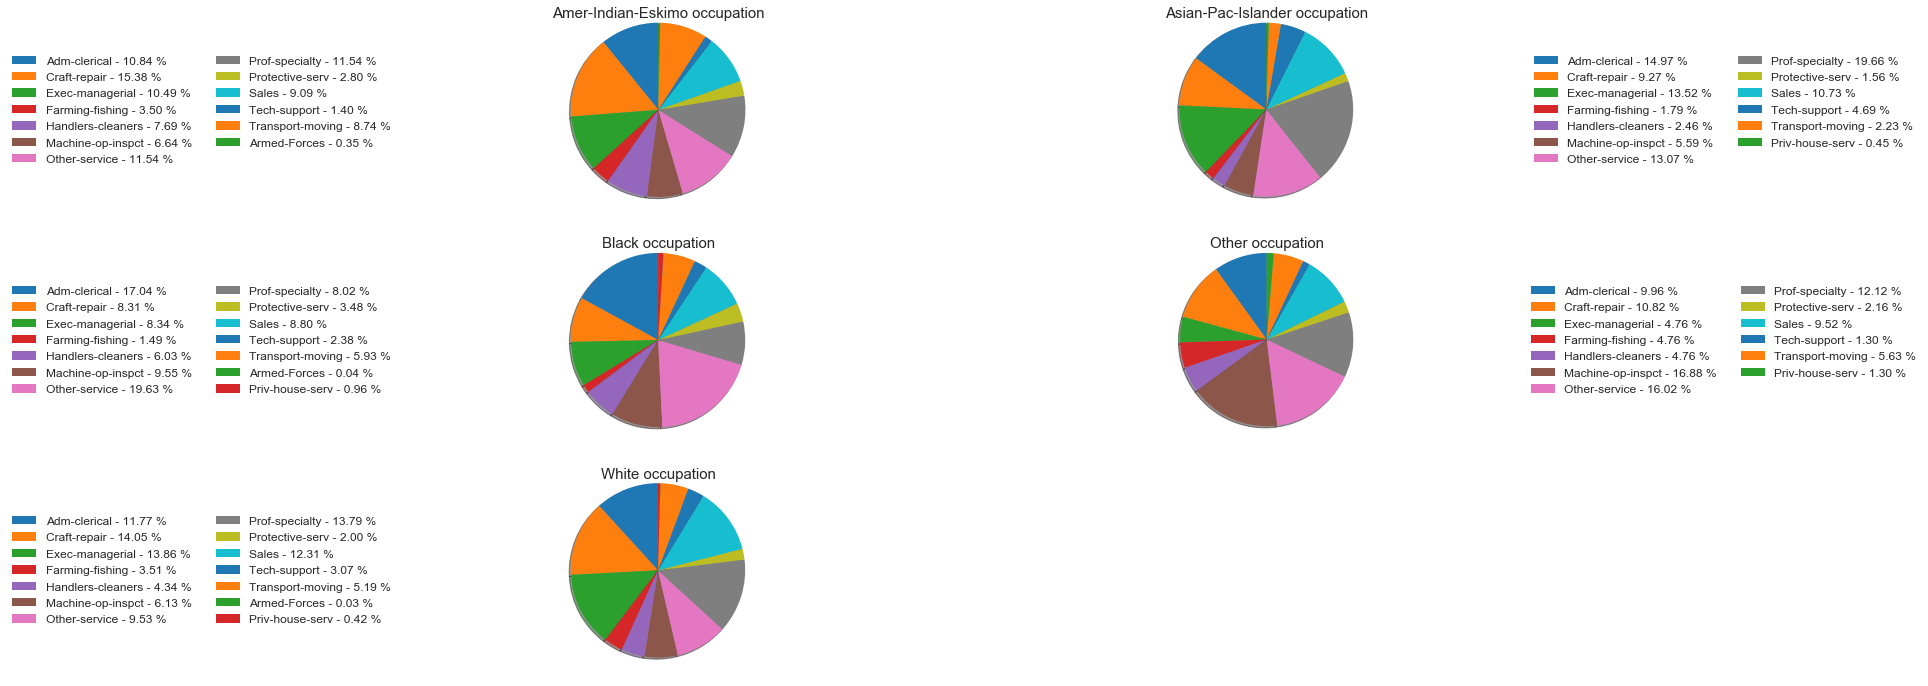

In [193]:
plot_pie(clean_adult, "race", "occupation")

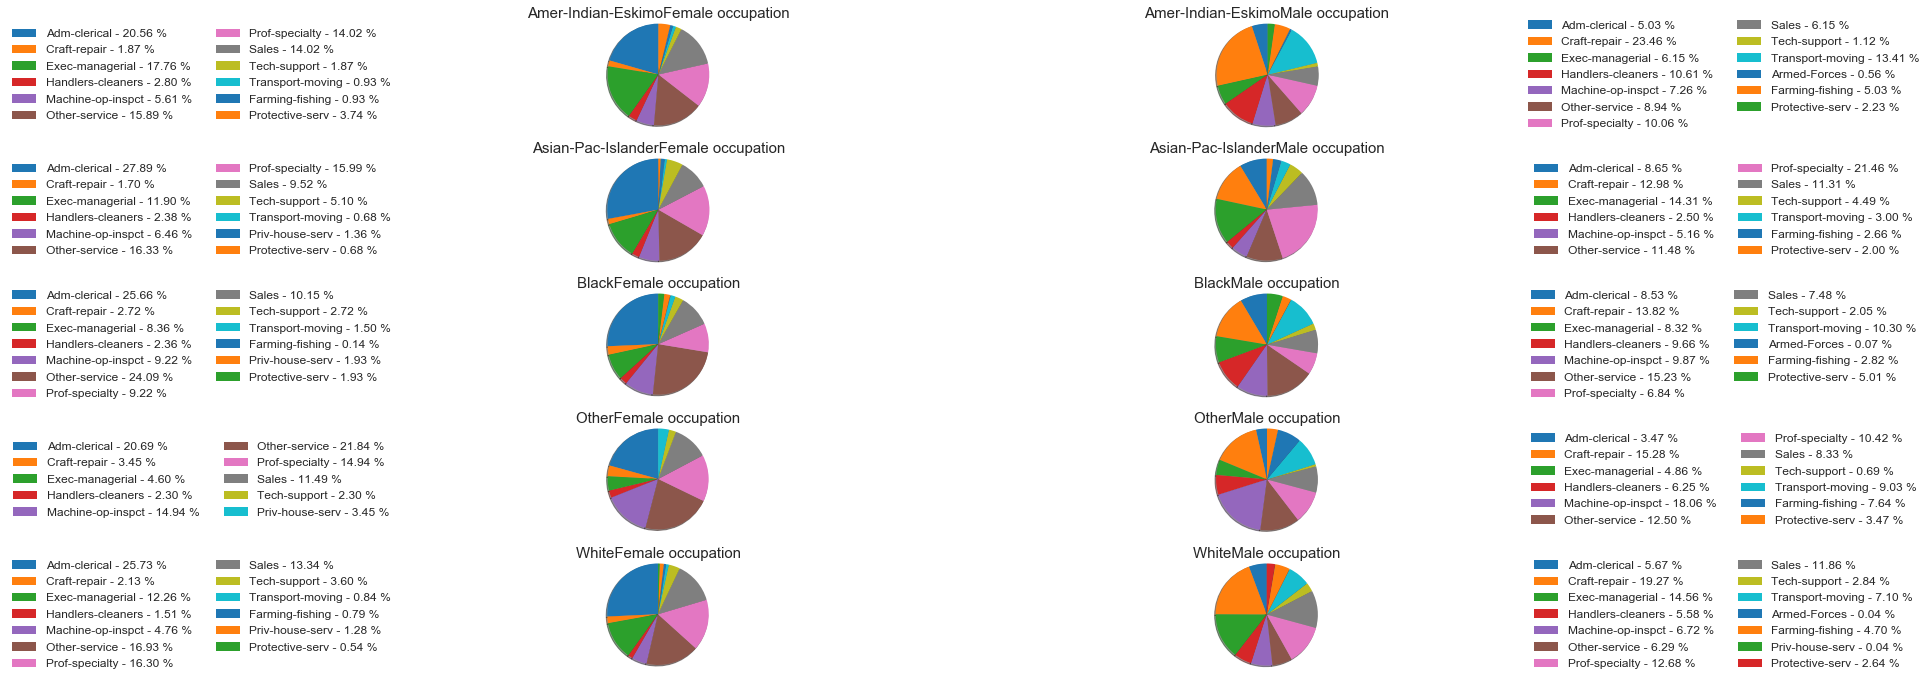

In [194]:
plot_pie(clean_adult, ["race", "sex"], "occupation")

Small side note: While doing this project, we found an interesting property regarding the `round()` function, in which by default this function actually rounds half numbers to the nearest even number. This is called bankers rounding: https://stackoverflow.com/questions/33019698/how-to-properly-round-up-half-float-numbers-in-python. We found this out when we were not getting the correct number of rows for our subplots.

In [ ]:
p